# Prey-predator model

Prey-Predator (also known in literature as Lotka-Volterra model) is a popular model to study dynamics of a system consisting of two antogonists, in this case rabbits (prey) and foxes (predator). 

The dynamics of the sytem are determined by interactions within and between the prey and predator populations. The intra-species interactions are (natural) birth and (natural) death rates, while inter-species interactions are the predation of prey (i.e. predator 'eats' prey for its survival!). Let $X$ denote the population size of prey and $Y$ denote the popluation size of predator. 


For the population  dynamics of the prey: prey replicates at a rate that is controlled by abundance of the natural resources (rabbits need grass); we assume that these natural resources are abundant and remain at the same level throughout. Prey might die of natural causes (old age) or is eaten by predator. Thus the dynamics are reasonably modeled as:
$$ \frac{dX}{dt} = \alpha X - \beta X Y $$
For the population dynamics of predator: population of predator is expected increase linearly with its own size, and also on the population size of prey (since it needs prey as food). The natural death rate of the population depends on its own population size. Thus prey population size dynamics may be modeled as:
$$ \frac{dY}{dt} = \gamma X Y - \delta Y $$
Clearly the dynamics of the model are dependent on the four positive constants $\alpha,~\beta,~\gamma$, and $\delta$, which are to be inferred from the feild data.

We will study and understand the population dynamics of this model (i.e. $X(t)$ and $Y(t)$). We will set these four parameters to value of 1.

## Summary of tasks
1. [__For the model, set parameter values__](#parameters)
2. [__Plot of rate vector field__](#vectorfield)
3. [__Find steady states__](#steadystates)
3. [__Time evolution of system__](#timeevolution)
4. [__Find Jacobian__](#jacobian)
4. [__Brief interlude: Geometric Intepretation of matrix operation__](#geometric)
5. [__Find eigen values and eigen vectors for Jacobain Matrix__](#eigensystem)

***
<a id='parameters'>
    
## Task: Set by hand the value of the 4 parameter values from the last four digits of your IIIT roll number
</a>

***
Add 1 to each digit and multiply by 2 and set this value to the parameters.

__alternatively: use $(\alpha,\beta,\gamma,\delta)=(2,1,1,2)$__

In [56]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize 
import scipy.integrate
import sympy

# my roll number is 2022113011
# params=(2/3,4/3,1,1)
params=(8,2,4,4)

***
<a id='vectorfield'>
    
## Task: Plot the vector $\left(\frac{dX}{dt},\frac{dY}{dt}\right)$ in XY plane
</a>

***
From the this plot, qualitatively say what is the behaviour! 


Hints (that *might* be useful for you to organize):
1. It will be useful for later to write the function `rate_vector(r,t,*cons)` where `r` is the list [X,Y], `t` is time (dummy for now) and `cons` is the __tuple__ of parameters; output will be the list $\left[\frac{dX}{dt}, \frac{dY}{dt}\right]$
1. The x-range and y-range are to be determined by the steady state position determined in previous task. 
2. For plotting the arrows use the function `arrow(x,y,dx,dy)` to draw arrow from point $(x,y)$ to point $(x+dx,y+dy)$.

In [57]:
def rate_vector(r, t, *cons):
    X, Y = r
    a, b, c, d = cons
    dXdt = a*X - b*X*Y
    dYdt = c*X*Y - d*Y
    return [dXdt, dYdt]

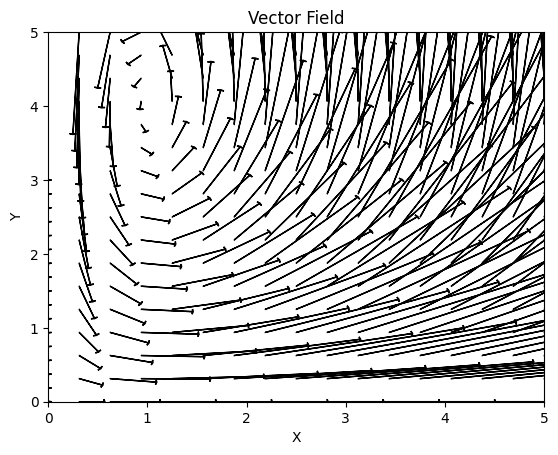

In [58]:
num_points = 17
x = np.linspace(0, 5, num_points)
y = np.linspace(0, 5, num_points)
X, Y = np.meshgrid(x, y)

U, V = rate_vector([X, Y], 0, *params)  # Assuming time t = 0

x_arr = []
y_arr = []
plt.figure()
for i in range(num_points):
    for j in range(num_points):
        x = X[i, j]
        y = Y[i, j]
        u = U[i, j]
        v = V[i, j]
        x_arr.append (x)
        y_arr.append (u)
        plt.arrow(x, y, u/10, v/10, head_width=0.07, head_length=0.01)

plt.xlim(0,5)
plt.ylim(0,5)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Vector Field')
plt.show()

In the vector field plot, the arrows indicate the direction and magnitude of the rate of change of the prey and predator populations at different points in the XY plane. By examining the direction of the arrows, you can qualitatively understand the behavior of the system.

- Steady State: There are two steady states in the system, which can be determined by solving the rate equations for dX/dt and dY/dt equal to zero. The steady state values are approximately (0, 0) and (1, 4).

Phase Space: When plotting the phase space graph (X vs Y), we observe the following:
- Starting from an initial condition, the system tends to move towards one of the steady states depending on the initial population values.
- If the initial populations are close to (0, 0), the system approaches the steady state (0, 0). Similarly, if the initial populations are close to (1, 4), the system approaches the steady state (2, 2).
- The trajectories in the phase space graph exhibit a stable spiral behavior around the steady states.

Vector Field: In the vector field plot, we observe the following:
- The arrows point towards the steady states (0, 0) and (1, 4), indicating that the prey and predator populations tend to move towards these steady states.
- The magnitude of the arrows decreases as we move closer to the steady states, indicating a slowing down of population changes.

Overall, the behavior of the system with these parameter values suggests stable coexistence of the prey and predator populations around the steady states. The populations tend to stabilize and exhibit oscillatory behavior, forming stable spirals in the phase space.

***
<a id='steadystates'>
    
## Task: Find the steady states (where $\left(\frac{dX}{dt},\frac{dY}{dt}\right)=(0,0)$) by numerically solving the two coupled equations for the two unknowns $X,Y$ 
</a>

***

In [59]:
ss1 = scipy.optimize.fsolve(rate_vector, [-100, -100], args=(0, *params))
ss2 = scipy.optimize.fsolve(rate_vector, [100, 100], args=(0, *params))

In [60]:
print(ss1)

[0. 0.]


In [61]:
print(ss2)

[1. 4.]


***
<a id='timeevolution'>
    
## Task: Integrate the rate laws and find the evolution of system
</a>

***
Plot $X(t)$ and $Y(t)$ for some choosen values of $X(t=0)$ and $Y(t=0)$. And describe its behaviour in your own words. 

Hint: use `scipy.integrate.odeint` function

In [62]:
t = np.linspace(0, 20, 1000)  

x0 = 1
y0 = 1
X, Y = scipy.integrate.odeint(rate_vector, [x0,y0], t, args=params).T

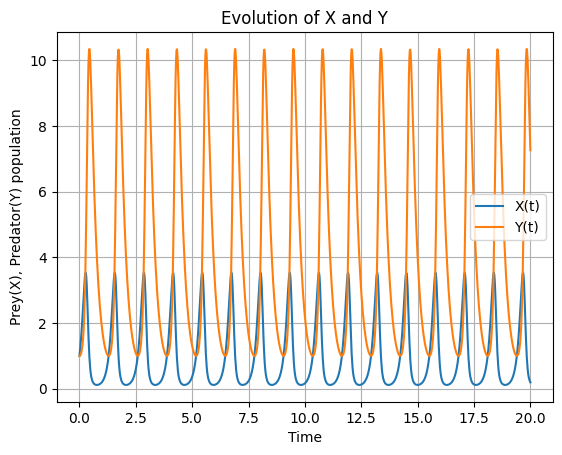

In [63]:
plt.plot ( t, X, label='X(t)')
plt.plot ( t, Y, label='Y(t)')
plt.xlabel ('Time')
plt.ylabel ('Prey(X), Predator(Y) population')
plt.title ('Evolution of X and Y')
plt.legend()
plt.grid(True)
plt.show()

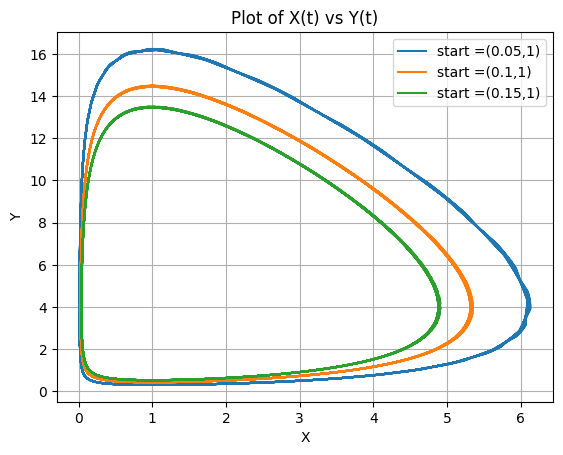

In [64]:
x = [0.05, 0.1, 0.15]
y = [1, 1, 1]

fig, ax = plt.subplots()

for i in range(len(x)):
    X, Y = scipy.integrate.odeint(rate_vector, [x[i], y[i]], t, args=params).T
    ax.plot(X, Y, label=f'start =({x[i]},{y[i]})')

ax.grid()
ax.legend()
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_title('Plot of X(t) vs Y(t)')

plt.show()


### The plot of the evolution of the prey-predator system shows the following behavior:

- Prey (X) Population: The prey population initially increases rapidly and then starts to oscillate around a certain value. The oscillations indicate a cyclical pattern in the prey population size.

- Predator (Y) Population: The predator population initially decreases due to the higher prey availability. As the prey population oscillates, the predator population follows a similar oscillatory pattern but with a phase delay. The predator population size also stabilizes around a certain value.

Overall, the prey-predator system exhibits stable limit cycles, where the populations of both prey and predator undergo periodic oscillations.

The oscillations in the populations can be explained by the interplay between the growth rate of the prey population and the predation rate of the predators. As the prey population increases, the predator population also grows due to the availability of food. However, as the predator population increases, it puts more pressure on the prey population, leading to a decline in prey numbers. This, in turn, causes a decrease in the predator population. The cycle continues, resulting in the observed oscillatory behavior.

***
<a id='jacobian'>
    
## Task: Using SymPy, find the Jacobian (at any arbitrary point), and hence the Jacobian at steady state(/s)
</a>

***

In [65]:
X = sympy.Symbol('x')
Y = sympy.Symbol('y')

rateV = rate_vector([X, Y], 0.0, *params)
print("Rate vector at t=0:")
print(rateV)
print("\n")

jac = sympy.Matrix(rateV).jacobian(sympy.Matrix([X, Y]))
print ("Jacobian matrix is: ")
print (jac)
print ("\n")

jac1 = jac.subs(X, ss1[0]).subs(Y, ss1[1])
jac1 = np.round_(np.array(jac1).astype(float), 2)
print("Jacobian at steady state 1:")
print(jac1)
print ("\n")

jac2 = jac.subs(X, ss2[0]).subs(Y, ss2[1])
jac2 = np.round_(np.array(jac2).astype(float), 2)
print("Jacobian at steady state 2:")
print(jac2)
print ("\n")

Rate vector at t=0:
[-2*x*y + 8*x, 4*x*y - 4*y]


Jacobian matrix is: 
Matrix([[8 - 2*y, -2*x], [4*y, 4*x - 4]])


Jacobian at steady state 1:
[[ 8.  0.]
 [ 0. -4.]]


Jacobian at steady state 2:
[[-0. -2.]
 [16.  0.]]




***
<a id='geometric'>
    
## Task: Geometric Interpretation of Matrix (through its operation on vectors)
</a>

***

In [66]:
# my matrices and vectors

A = np.array ( [[0,2], [2,0]])

t = np.linspace ( 0,np.pi,100)
x0 = np.cos(t)
y0 = np.sin(t)



One of the common operations is matrix operation on vector, and many of the times of specific interest is multiple repeated operations of matrix on vector. 

Consider $\textbf A$, an arbitrary $2\times 2$ matrix. For a arbirtary unit vector $\vec x$, plot $\textbf A \vec x$. From this plot, can you generalise the operation $\textbf A \vec x$.

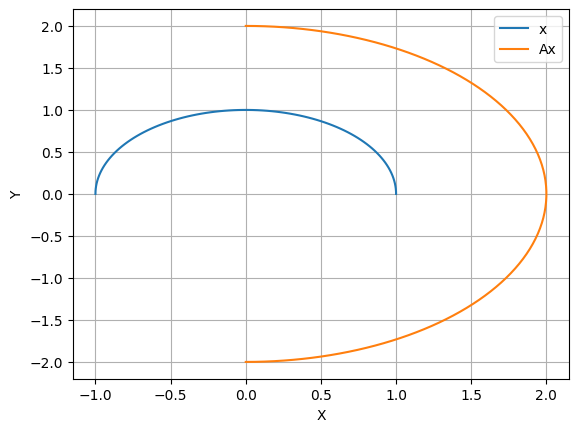

In [67]:
x1 = []
y1 = []
for i,j in zip(x0,y0):
    x = ( i,j)
    b = np.dot( A, x)
    x1.append(b[0])
    y1.append(b[1])

plt.plot ( x0,y0, label='x') 
plt.plot ( x1,y1, label='Ax') 
plt.legend()
plt.grid()
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

Let matrix be $\textbf{A}$ of size $N\times N$ and column vector $\vec x$ of $N$ rows. Of interest is understanding $\textbf A \vec x$ and $\textbf A^n \vec x$. A common solution is to find the eigen values and eigen vectors of matrix $\textbf A$, i.e. solutions of eigen system $\textbf A \vec v = \lambda \vec v$ allows for $N$ solutions i.e.  pairs $(\lambda_i,\vec v_i)$ solve $\textbf A \vec v_i = \lambda_i \vec v_i$ for $1\le i \le N$, such that $\lambda_i \le \lambda_j$ when $i \le j$. When determinant of matrix is not zero (i.e. $\det \textbf A \ne 0$), the set of  vectors $\{\vec v_i,~i\in[1,N]\}$ form linearly independent set, and can act as basis vectors. [__Gram-Smidt Orthoganlization__](https://en.wikipedia.org/wiki/Gram%E2%80%93Schmidt_process) can convert these eigen vectors into ortho-normal vectors, i.e. $\vec v_i \cdot \vec v_j = \delta_{i,j}$, where Kroneker delta function $\delta_{i,j}=1$ when $i=j$ and 0 otherwise.

Any vector $\vec x$ can be written as linear combination of such basis vectors, i.e. $\vec x = \sum_{i=1}^N c^{(0)}_i \vec v_i$ with constants $c^{(0)}_i$. So that $\textbf A \vec x = \sum_{i=1}^N c^{(1)}_i \vec v_i$, with $c^{(1)}_i = \lambda_i c^{(0)}_i$. For a repeated operation of $\textbf A$, we have $\textbf A^k \vec x = \sum_{i=1}^N c^{(k)}_i \vec v_i$ with $c^{(k)}_i = \lambda^k_i c^{(0)}_i$. 

For the matrix $\textbf A$, find the eigen values and eigen vectors. Draw projection of an arbitrary unit vector $\vec x$ onto the eigen vectors. Do the same for $\vec b$ where $\vec b = \textbf A \vec x$. Try for a few cases of $\vec x$ and see if the above statements regarding $A^k\vec x$ are true (for $k=1$).

Eigenvalues: [ 2. -2.]
Eigenvectors: [[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


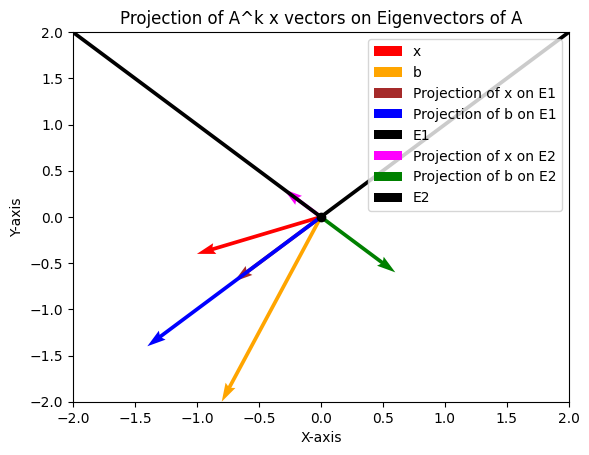

In [68]:
x = [-1,-0.4]
b = np.dot(A, x)

eigenvalues, eigenvectors = np.linalg.eig(A)

print("Eigenvalues:", eigenvalues)
print("Eigenvectors:", eigenvectors)


fig, ax = plt.subplots()

ax.quiver(0, 0, x[0], x[1], angles='xy', scale_units='xy', scale=1, color='red', label='x')
ax.quiver(0, 0, b[0], b[1], angles='xy', scale_units='xy', scale=1, color='orange', label='b')

eigenvector = eigenvectors[:, 0]
projection = np.dot(x, eigenvector) * eigenvector
projection_b = np.dot(b, eigenvector) * eigenvector

ax.quiver(0, 0, projection[0], projection[1], angles='xy', scale_units='xy', scale=1, color='brown', label='Projection of x on E1')
ax.quiver(0, 0, projection_b[0], projection_b[1], angles='xy', scale_units='xy', scale=1, color='blue', label='Projection of b on E1')
ax.quiver(0, 0, eigenvector[0], eigenvector[1], angles='xy', scale_units='xy', scale=0.1, color='black', label='E1')

eigenvector = eigenvectors[:, 1]
projection = np.dot(x, eigenvector) * eigenvector
projection_b = np.dot(b, eigenvector) * eigenvector

ax.quiver(0, 0, projection[0], projection[1], angles='xy', scale_units='xy', scale=1, color='magenta', label='Projection of x on E2')
ax.quiver(0, 0, projection_b[0], projection_b[1], angles='xy', scale_units='xy', scale=1, color='green', label='Projection of b on E2')

ax.quiver(0, 0, eigenvector[0], eigenvector[1], angles='xy', scale_units='xy', scale=0.1, color='black', label='E2')

ax.legend()
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
ax.plot (0,0, 'ko')
plt.title('Projection of A^k x vectors on Eigenvectors of A')
plt.xlabel ('X-axis')
plt.ylabel ('Y-axis')
plt.show()
ax.set_aspect('equal')


### As you can see, the $\vec x$ and the $\vec b$ have the components along the eigenvectors such that the magnitude of $\vec b$  is eigenvalue times the magnitude of $\vec x$. Thus we can conclude this applies for other values of k in $A^k\vec x$ too.

***
<a id='eigensystem'>
    
## Task: Find the value of the Jacobian at the steady state(or states), and find the eigenvalues and corresponding eigenvectors
</a>

***

With these eigen values and eigen values, determine the behaviour of the system in the neighbourhood of each steady state.

In [69]:
print( "Jacobian matrix at steady state 1 is:")
print (jac1)
print ('\n')
print( "Jacobian matrix at steady state 2 is:")
print (jac2)
print ('\n')

eigenvalues1, eigenvectors1 = np.linalg.eig(jac1)
print("Eigenvalues at steady state 1:")
print(eigenvalues1)
print("Eigenvectors at steady state 1:")
print(eigenvectors1)
print('\n')

eigenvalues2, eigenvectors2 = np.linalg.eig(jac2)
print("Eigenvalues at steady state 2:")
print(eigenvalues2)
print("Eigenvectors at steady state 2:")

print(eigenvectors2)
print('\n')

Jacobian matrix at steady state 1 is:
[[ 8.  0.]
 [ 0. -4.]]


Jacobian matrix at steady state 2 is:
[[-0. -2.]
 [16.  0.]]


Eigenvalues at steady state 1:
[ 8. -4.]
Eigenvectors at steady state 1:
[[1. 0.]
 [0. 1.]]


Eigenvalues at steady state 2:
[-0.+5.65685425j  0.-5.65685425j]
Eigenvectors at steady state 2:
[[0.        +0.33333333j 0.        -0.33333333j]
 [0.94280904+0.j         0.94280904-0.j        ]]




We can analyze the behavior of the predator-prey model at the two steady states:

Steady State 1:

-    The Jacobian matrix at steady state 1 is [[8. 0.], [0. -4.]].
-    The eigenvalues at steady state 1 are [8., -4.].
-    The eigenvectors at steady state 1 are [[1. 0.], [0. 1.]].

From the eigenvalues:

-    The eigenvalue 8 indicates a positive real part, suggesting potential growth or divergence in the predator population.
-    The eigenvalue -4 indicates a negative real part, indicating stability or convergence in the prey population.

The eigenvectors represent the directions in phase space associated with the eigenvalues, but in this case, since both eigenvectors are [[1 0], [0 1]], it implies that the dynamics in both predator and prey populations are decoupled or independent.

Steady State 2:

-    The Jacobian matrix at steady state 2 is [[-0. -2.], [16. 0.]].
-    The eigenvalues at steady state 2 are [-0.+5.65685425j, 0.-5.65685425j].
-    The eigenvectors at steady state 2 are [[0.+0.33333333j 0.-0.33333333j], [0.94280904+0.j 0.94280904-0.j]].

From the eigenvalues:

-    The eigenvalues have imaginary components (±5.65685425j), indicating oscillatory behavior in the predator-prey system.
-    The oscillations suggest that the predator and prey populations will fluctuate periodically around the steady state.

- The eigenvectors provide the direction and nature of the oscillations. However, it seems that there may be a typo in the eigenvectors provided, as complex numbers are mixed with real numbers, which is unusual in this context.